# <center> SMS Spam Detection by Natural Language Processing <center>

# 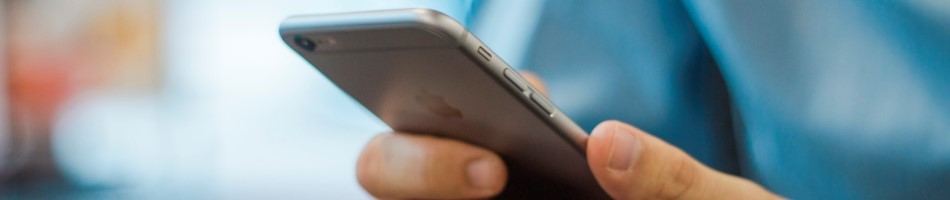

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Loading-Dataset" data-toc-modified-id="Loading-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading Dataset</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Ham/Spam-Messages-Prediction" data-toc-modified-id="Ham/Spam-Messages-Prediction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ham/Spam Messages Prediction</a></span><ul class="toc-item"><li><span><a href="#Text-Preprocessing-Function" data-toc-modified-id="Text-Preprocessing-Function-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Text Preprocessing Function</a></span></li><li><span><a href="#Splitting-the-Dataset" data-toc-modified-id="Splitting-the-Dataset-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Splitting the Dataset</a></span></li><li><span><a href="#Creating-Data-Pipeline" data-toc-modified-id="Creating-Data-Pipeline-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Creating Data Pipeline</a></span><ul class="toc-item"><li><span><a href="#MultinomialNB-Classifier-without-Text-Preprocessing" data-toc-modified-id="MultinomialNB-Classifier-without-Text-Preprocessing-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>MultinomialNB Classifier without Text Preprocessing</a></span></li><li><span><a href="#MultinomialNB-Classifier-with-Text-Preprocessing" data-toc-modified-id="MultinomialNB-Classifier-with-Text-Preprocessing-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>MultinomialNB Classifier with Text Preprocessing</a></span></li><li><span><a href="#MultinomialNB-Classifier-with-Only-Removing-Stop-Words" data-toc-modified-id="MultinomialNB-Classifier-with-Only-Removing-Stop-Words-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>MultinomialNB Classifier with Only Removing Stop Words</a></span></li><li><span><a href="#Passive-Aggressive-Classifier-without-Text-Preprocessing" data-toc-modified-id="Passive-Aggressive-Classifier-without-Text-Preprocessing-5.3.4"><span class="toc-item-num">5.3.4&nbsp;&nbsp;</span>Passive Aggressive Classifier without Text Preprocessing</a></span></li><li><span><a href="#Passive-Aggressive-Classifier-with-Text-Preprocessing" data-toc-modified-id="Passive-Aggressive-Classifier-with-Text-Preprocessing-5.3.5"><span class="toc-item-num">5.3.5&nbsp;&nbsp;</span>Passive Aggressive Classifier with Text Preprocessing</a></span></li><li><span><a href="#Passive-Aggressive-Classifier-with-Only-Removing-Stop-Words" data-toc-modified-id="Passive-Aggressive-Classifier-with-Only-Removing-Stop-Words-5.3.6"><span class="toc-item-num">5.3.6&nbsp;&nbsp;</span>Passive Aggressive Classifier with Only Removing Stop Words</a></span></li><li><span><a href="#Random-Forest-Classifier-without-Text-Preprocessing" data-toc-modified-id="Random-Forest-Classifier-without-Text-Preprocessing-5.3.7"><span class="toc-item-num">5.3.7&nbsp;&nbsp;</span>Random Forest Classifier without Text Preprocessing</a></span></li><li><span><a href="#Random-Forest--Classifier-with-Text-Preprocessing" data-toc-modified-id="Random-Forest--Classifier-with-Text-Preprocessing-5.3.8"><span class="toc-item-num">5.3.8&nbsp;&nbsp;</span>Random Forest  Classifier with Text Preprocessing</a></span></li><li><span><a href="#Random-Forest--Classifier-with-Only-Removing-Stop-Words" data-toc-modified-id="Random-Forest--Classifier-with-Only-Removing-Stop-Words-5.3.9"><span class="toc-item-num">5.3.9&nbsp;&nbsp;</span>Random Forest  Classifier with Only Removing Stop Words</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Introduction

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. The files contain one message per row and each row contains the label (ham or spam) and the raw text message.

In this notebook we will use nltk librarie to predict and classify the label of text messages and correctly predict a given piece of text as Spam or Ham.

## Importing Libraries

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import WhitespaceTokenizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer   
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

## Loading Dataset

In [ ]:
df_sms = pd.read_csv('../input/sms-spam-collection-dataset/spam.csv',delimiter=',',encoding='latin-1')

In [ ]:
df_sms.head()

In [ ]:
df_sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [ ]:
df_sms.columns=['label','message']

In [ ]:
df_sms.head()

In [ ]:
df_sms.describe()

## Exploratory Data Analysis

In [ ]:
df_sms.groupby('label').describe()

In [ ]:
df_sms['length']=df_sms['message'].apply(lambda x: len(x))

In [ ]:
df_sms.head()

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(x='length', bins=150, data=df_sms,edgecolor='black')
plt.title('Distribution of the Length of Messages', fontsize=15)
plt.xlabel('Message Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [ ]:
df_sms['length'].max()

In [ ]:
df_sms['length'].describe()

In [ ]:
df_sms[df_sms['length']==910]['message']

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.hist(x='length', bins=60, data=df_sms[df_sms['label']=='ham'],edgecolor='black', color='m')
plt.title('Distribution of the Length of Ham Messages', fontsize=15)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Message Length', fontsize=12)

plt.subplot(1,2,2)
plt.hist(x='length', bins=60, data=df_sms[df_sms['label']=='spam'],edgecolor='black', color='teal')
plt.title('Distribution of the Length of Spam Messages', fontsize=15)
plt.ylabel('')
plt.yticks([])
plt.xlabel('Message Length', fontsize=12)

plt.show()

## Ham/Spam Messages Prediction

### Text Preprocessing Function

We define a preprocessing function that performs the following operations:

- Converting text to lower case

- Removing numbers from the text corpus

- Removing punctuation from the text corpus

- Removing special characters such as ‘<’, ‘…’ from the text corpus

- Removing english stopwords

- Stemming words to root words

- Removing extra whitespaces from the text corpus

In [ ]:
ps=PorterStemmer()
wst= WhitespaceTokenizer() 

##### 1. Converting text to lower case
def lower_func (x):
    return x.lower()


##### 2. Removing Numbers from the text corpus
def remove_number_func (x): 
    new=""
    for a in x:
        if a.isdigit()==False:
            new=new+a
    return new


##### 3. Removing punctuation 
def remove_punc_func(x):
    new=''
    for a in x:
        if a not in string.punctuation:
            new=new+a
    return new

##### 4. Removing special characters
def remove_spec_char_func(x):
    new=''
    for a in x:
        if (a.isalnum()==True) or (a==' '):
            new=new+a
    return(new)

##### 5. Removing english stopwords
def remove_stopwords(x):
    new=[]
    for a in x.split():
        if a not in stopwords.words('english'):
            new.append(a)
    return " ".join(new)

##### 6. Stemming words to root words
def stem_func(x):
    wordlist = word_tokenize(x)
    psstem = [ps.stem(a) for a in wordlist]
    return ' '.join(psstem)

##### 7. Removing extra whitespaces 
def remove_whitespace_func(x):
    return(wst.tokenize(x))

def compose(f, g):
    return lambda x: f(g(x))

final=compose(compose(compose(compose(compose(compose(remove_whitespace_func,stem_func),remove_stopwords),remove_spec_char_func),remove_punc_func),remove_number_func),lower_func)

### Splitting the Dataset 

In [ ]:
X=df_sms['message']
y=df_sms['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Creating Data Pipeline

#### MultinomialNB Classifier without Text Preprocessing 

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()), 
])

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
prediction1=pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction1))

#### MultinomialNB Classifier with Text Preprocessing

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=final)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()), 
])

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
prediction2=pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction2))

#### MultinomialNB Classifier with Only Removing Stop Words

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer='word', stop_words='english')),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()), 
])

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
prediction3=pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction3))

#### Passive Aggressive Classifier without Text Preprocessing

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', PassiveAggressiveClassifier()), 
])

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
prediction4=pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction4))

#### Passive Aggressive Classifier with Text Preprocessing

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=final)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', PassiveAggressiveClassifier()), 
])

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
prediction5=pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction5))

#### Passive Aggressive Classifier with Only Removing Stop Words

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer='word', stop_words='english')),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', PassiveAggressiveClassifier()), 
])

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
prediction6=pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction6))

#### Random Forest Classifier without Text Preprocessing

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', RandomForestClassifier()), 
])

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
prediction7=pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction7))

#### Random Forest  Classifier with Text Preprocessing

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=final)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', RandomForestClassifier()), 
])

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
prediction8=pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction8))

#### Random Forest  Classifier with Only Removing Stop Words

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer='word', stop_words='english')),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', RandomForestClassifier()), 
])

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
prediction9=pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction9))

In [ ]:
print('MultinomialNB Classifier without text pre-processing', accuracy_score(y_test,prediction1))
print('MultinomialNB Classifier with text pre-processing: ', accuracy_score(y_test,prediction2))
print('MultinomialNB Classifier with only removing stop words', accuracy_score(y_test,prediction3))
print('\n')
print('Passive Aggressive Classifier without text pre-processing: ', accuracy_score(y_test,prediction4))
print('Passive Aggressive Classifier with text pre-processing: ', accuracy_score(y_test,prediction5))
print('Passive Aggressive Classifier with only removing stop words: ', accuracy_score(y_test,prediction6))
print('\n')
print('Random Forest Classifier without text pre-processing: ', accuracy_score(y_test,prediction7))
print('Random Forest Classifier with text pre-processing: ', accuracy_score(y_test,prediction8))
print('Random Forest Classifier with only removing stop words: ', accuracy_score(y_test,prediction9))

We can see that the Passive Agreesive Classifier is more effective in predicting whether sms is ham or spam as compared with MultinomialNB and Random Forest Classifiers. The highest accuracy score was obtained for the Passive Agreesive Classifier with  with only removing stop words.

## Conclusion

In this project, the following tasks were preformed:

- We performed exploratory data analysis on the SMS Spam Collection Dataset. 

- We built binary classifiers that classify ham and spam messages. We used three different classifiers including Random Forest Classifier, Naive-Bayes Classifier and passive Agressive Classifier to classify messages into ham/spam categories and applied them with and without text preprocessing and with only removing the stop words.

- Passive Aggressive was the best model for this analysis of the messages. The highest accuracy was 99.01% and it was obtained for the Passive Aggressive model applied on the messages which only their stop words have been removed.